In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [5]:
df_movies = pd.read_csv('dataset/movies.csv')
df_rating = pd.read_csv('dataset/ratings.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [7]:
print("Movies data shape: ", df_movies.shape)
print("Ratings data shape: ", df_rating.shape)

Movies data shape:  (10329, 3)
Ratings data shape:  (105339, 4)


In [9]:
total_genres = []
for g in df_movies.genres:
    g = g.split('|')
    if g not in total_genres:
        total_genres.append(g)
total_genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 'Thriller'],
 ['

In [11]:
year, title = [], []
for t in df_movies.title:
    title.append(t[:-7])
    year.append(t[-7:])

In [13]:
word_cloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2 ,
                        min_word_length=3).generate(str(total_genres))

word_cloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2 ,
                        min_word_length=3).generate(str(title))

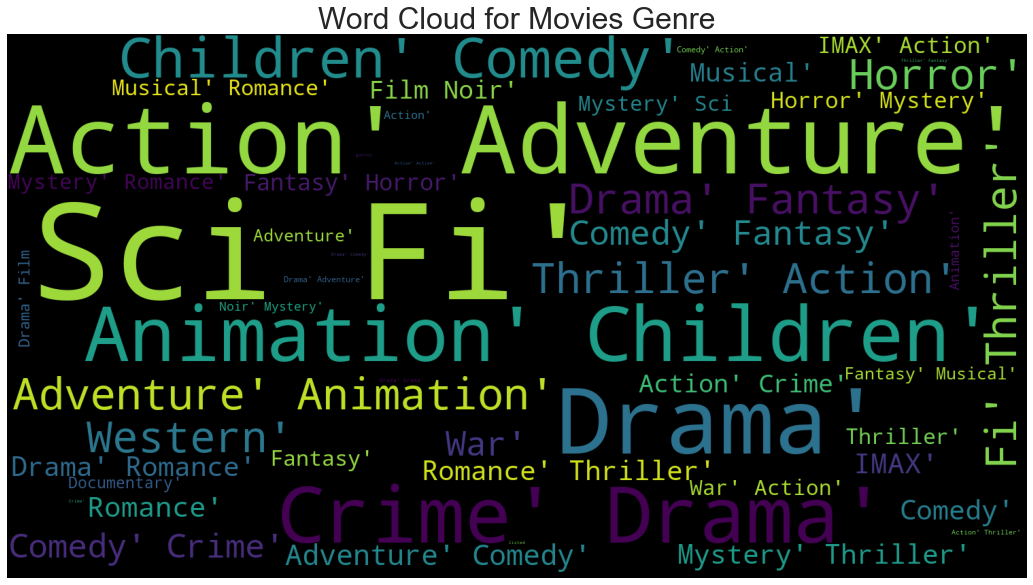

In [14]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Genre',fontsize=30)
plt.imshow(word_cloud_genre);

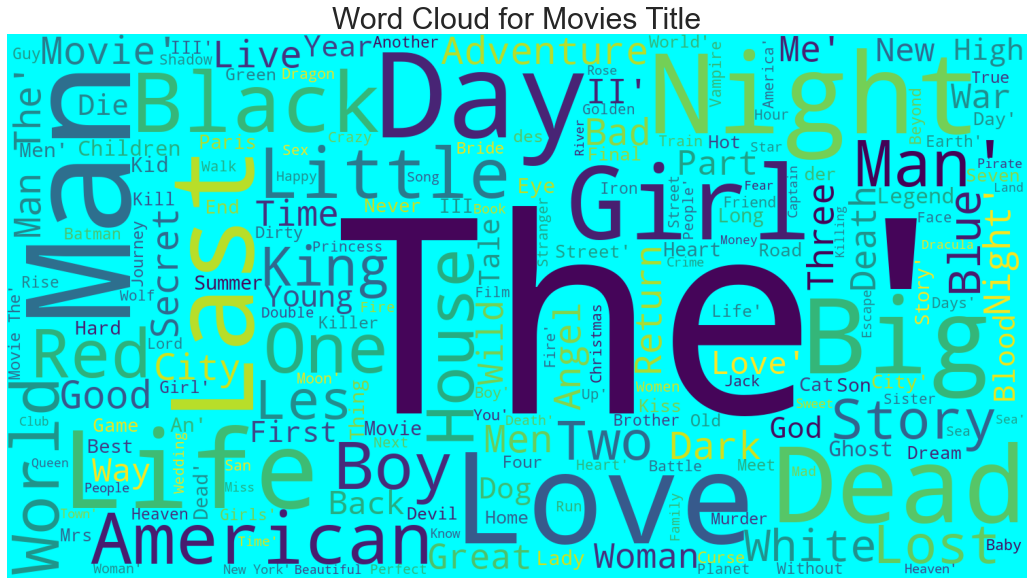

In [15]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

In [16]:
final_df = pd.merge(df_rating, df_movies, how='left',on='movieId')
final_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [17]:
title_rating = final_df.groupby(['title'])[['rating']].sum()
title_rating = title_rating.nlargest(10,'rating')
title_rating.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


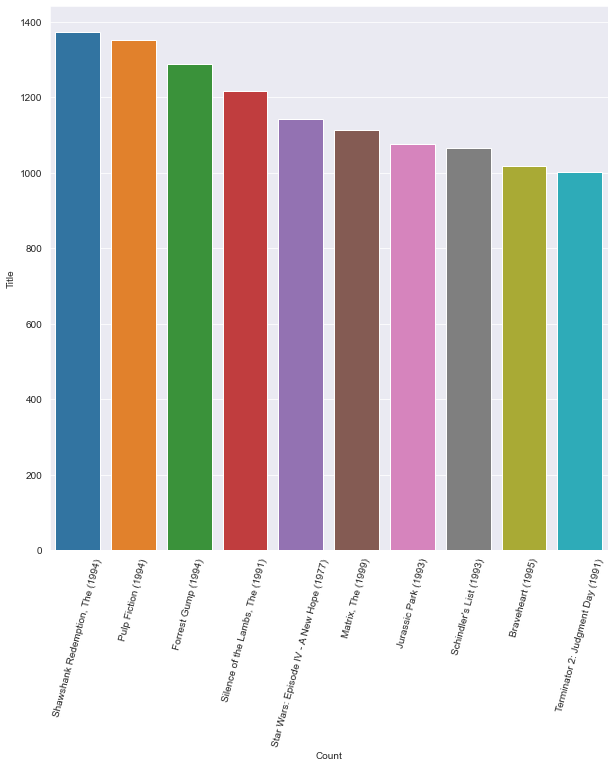

In [18]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75);
sns.barplot(title_rating.index, title_rating['rating']);
plt.ylabel('Title');
plt.xlabel('Count');

In [19]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

In [20]:
movie_user = final_df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cos_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [22]:
indices=pd.Series(df_movies.index,index=df_movies['title'])
titles=df_movies['title']
def recom_sys(title):
    idx = indices[title]
    similarity_scores = list(enumerate(cos_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:21]
    movie_indices = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indices]

In [24]:
recom_sys('Shawshank Redemption, The (1994)')

29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
35                               Dead Man Walking (1995)
89                               Hate (Haine, La) (1995)
105                Young Poisoner's Handbook, The (1995)
215                              The Glass Shield (1994)
217                            Heavenly Creatures (1994)
237                                 Little Odessa (1994)
252                              New Jersey Drive (1995)
255                            Once Were Warriors (1994)
279                     Shawshank Redemption, The (1994)
350                                 Jason's Lyric (1994)
358                                 Above the Rim (1994)
379                                 Carlito's Way (1993)
662                              American Buffalo (1996)
691                               Cyclo (Xich lo) (1995)
695                                Godfather, The (1972)
780                          Angel on My Shoulder (1946)
881                            

In [25]:
recom_sys('Star Wars: Episode IV - A New Hope (1977)')

230             Star Wars: Episode IV - A New Hope (1977)
277                                       Stargate (1994)
390                                 Demolition Man (1993)
958     Star Wars: Episode V - The Empire Strikes Back...
971     Star Wars: Episode VI - Return of the Jedi (1983)
1116           Star Trek III: The Search for Spock (1984)
1426                                 Lost in Space (1998)
1653                                Rocketeer, The (1991)
1664                                          Tron (1982)
1800                            Six-String Samurai (1998)
2020                                   Logan's Run (1976)
2098     Star Wars: Episode I - The Phantom Menace (1999)
2107                                      Superman (1978)
2109                                  Superman III (1983)
2110              Superman IV: The Quest for Peace (1987)
2924                                       Mad Max (1979)
2925                 Road Warrior, The (Mad Max 2) (1981)
2926          

In [26]:
recom_sys('Forrest Gump (1994)')

1838           Life Is Beautiful (La Vita è bella) (1997)
2399                  Train of Life (Train de vie) (1998)
4504          Divine Intervention (Yadon ilaheyya) (2002)
7554    I Served the King of England (Obsluhoval jsem ...
5243                              Kiss Them for Me (1957)
6170                            To Be or Not to Be (1983)
348                            Colonel Chabert, Le (1994)
741                             Gone with the Wind (1939)
946                           English Patient, The (1996)
1510                         From Here to Eternity (1953)
1626                                Doctor Zhivago (1965)
2185                                  Barry Lyndon (1975)
2332               Year of Living Dangerously, The (1982)
2498                           Ride with the Devil (1999)
2707               Love Is a Many-Splendored Thing (1955)
3146                                        Malèna (2000)
3297                       I Know Where I'm Going! (1945)
3399          

In [27]:
recom_sys('Silence of the Lambs, The (1991)')

1714             Henry: Portrait of a Serial Killer (1986)
1899                                         Psycho (1998)
3639                                           Cure (1997)
4246     FearDotCom (a.k.a. Fear.com) (a.k.a. Fear Dot ...
4253                    Last House on the Left, The (1972)
6823                                     Wolf Creek (2005)
7184                                        Saw III (2006)
7398                                Hostel: Part II (2007)
7527                                         Saw IV (2007)
7807                                      Pathology (2008)
7922                                          Saw V (2008)
8181                                 Collector, The (2009)
8861                           I Spit on Your Grave (2010)
9200                                         Fright (1972)
9696                                     Purge, The (2013)
9761                                Black Room, The (1935)
9781                         I Spit on Your Grave 2 (201

In [28]:
recom_sys('Pulp Fiction (1994)')

537                                          Fargo (1996)
841                                        Freeway (1996)
2606    Man Bites Dog (C'est arrivé près de chez vous)...
4495               Confessions of a Dangerous Mind (2002)
4771                                Hard Word, The (2002)
6897                                    Cul-de-sac (1966)
7620                                     In Bruges (2008)
7972                                     Nobel Son (2007)
8233                               Informant!, The (2009)
8474                               Leaves of Grass (2009)
20                                      Get Shorty (1995)
1349                  Man Who Knew Too Little, The (1997)
1669                     Dead Men Don't Wear Plaid (1982)
2033             Lock, Stock & Two Smoking Barrels (1998)
2068                                 Goodbye Lover (1999)
3162                                        Snatch (2000)
5271                               Big Bounce, The (2004)
5749          